In [30]:
!pip install wordcloud
!pip install nltk
!pip install seaborn


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import re  # regular expression


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
twitter_df = pd.read_csv(r"C:\Users\DELL\Downloads\twitter_training.csv",names=['tweet id','entity','sentiments','tweet content'])

# As the data didn't had any columns so we have created the columns names while reading out our data

In [33]:
# To get the top 20 data 

twitter_df.head(20)

,tweet id,entity,sentiments,tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [34]:
# To get the last 20 data 

twitter_df.tail(20)

,tweet id,entity,sentiments,tweet content
74662,9197,Nvidia,Neutral,Nvidia therefore doesn ’ t want to give up its...
74663,9197,Nvidia,Neutral,is doesn’t should I give up its password ‘cryp...
74664,9198,Nvidia,Negative,Nvidia really delayed the 3070 2 weeks .
74665,9198,Nvidia,Negative,Nvidia really delayed the 3070 by 2 weeks.
74666,9198,Nvidia,Negative,Nvidia did delay by 3070 2 weeks.
74667,9198,Nvidia,Negative,Nvidia really delayed the 3070 several weeks.
74668,9198,Nvidia,Negative,Nvidia really only delayed the 3070 2 flight w...
74669,9198,Nvidia,Negative,Nvidia really delayed the next 2 weeks.
74670,9199,Nvidia,Positive,Let no elim go unnoticed. . . . NVIDIA Highlig...
74671,9199,Nvidia,Positive,t let Elim go unnoticed.... NVIDIA Highlights ...


# EDA

In [35]:
# To get all statistical data 

twitter_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet id,74682.0,6432.586165,3740.42787,1.0,3195.0,6422.0,9601.0,13200.0


In [36]:
# To know about any null values in our data

twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet id       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiments     74682 non-null  object
 3   tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [37]:
# To know about any null values in any column

twitter_df.isna().any()

tweet id         False
entity           False
sentiments       False
tweet content     True
dtype: bool

#### Here we can observe is we have some null values present in 'tweet content' only

In [38]:
# To get the total numbers of null value in our column

twitter_df.isna().sum()

tweet id           0
entity             0
sentiments         0
tweet content    686
dtype: int64

In [39]:
# To know in which rows at 'tweet content' null values are present

twitter_df[twitter_df['tweet content'].isna()]

,tweet id,entity,sentiments,tweet content
61,2411,Borderlands,Neutral,NaN
553,2496,Borderlands,Neutral,NaN
589,2503,Borderlands,Neutral,NaN
745,2532,Borderlands,Positive,NaN
1105,2595,Borderlands,Positive,NaN
...,...,...,...,...
73972,9073,Nvidia,Positive,NaN
73973,9073,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN
74422,9154,Nvidia,Positive,NaN


In [40]:
# To remove all the null values in our data

twitter_df.dropna(inplace=True)

#### As the null values are present in tweet content which is a string type column , so we will remove all the null values.

In [41]:
twitter_df.head(10)

,tweet id,entity,sentiments,tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [42]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet id       73996 non-null  int64 
 1   entity         73996 non-null  object
 2   sentiments     73996 non-null  object
 3   tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


#### After treating all the null values we can observe that we have no empty rows present in any of the data

# Data Visualisation

Text(0.5, 1.0, 'Partitions of all the Sentiments')

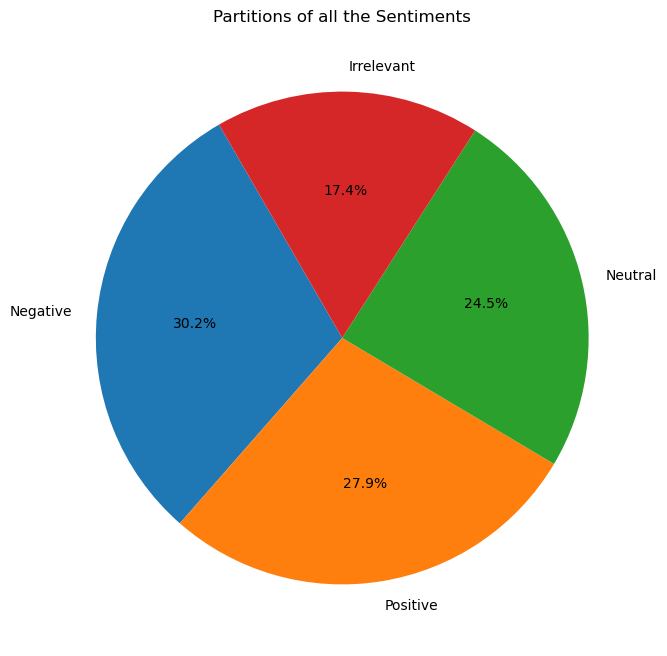

In [43]:
# To plot pie chart for partition of all the sentiments 

# Label and Size 
labels = twitter_df.sentiments.value_counts().keys()
sizes = twitter_df.sentiments.value_counts()

plt.figure(figsize=(8, 8))  # Optional: to set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=120)
plt.title('Partitions of all the Sentiments')

#### Analysis of Sentiment Distribution:

The sentiment analysis reveals that:

- **Negative Sentiments**:
  - Negative sentiments have the highest percentage, indicating a significant portion of tweets express dissatisfaction or criticism.

- **Irrelevant Sentiments**:
  - Irrelevant sentiments have the lowest percentage, showing that such tweets are less common in the dataset.

This distribution highlights the need for entities to address negative feedback while focusing less on irrelevant content.

# 

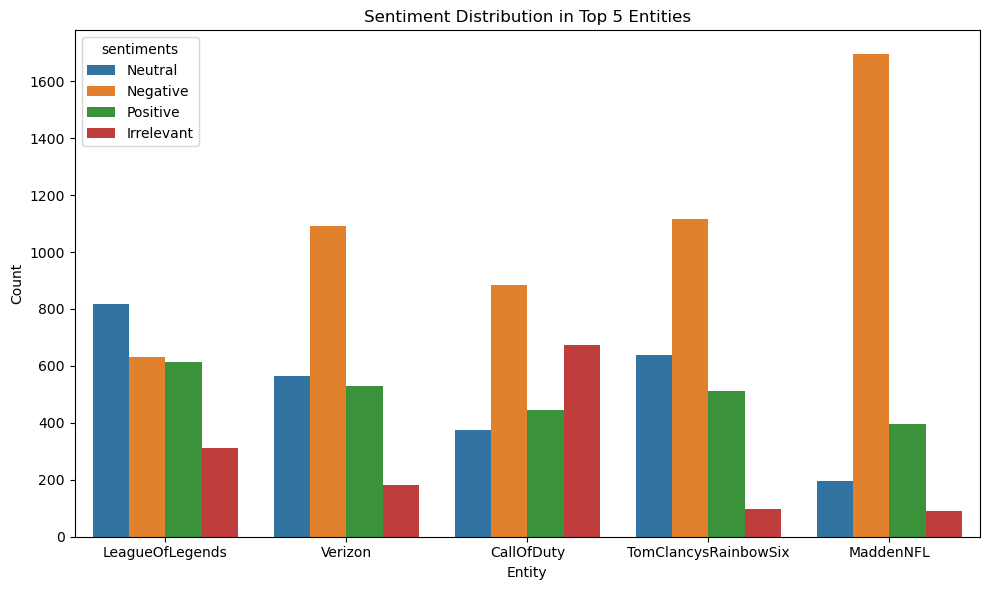

In [44]:
plt.figure(figsize=(10, 6))

# To filter out top 5 'entities/brands' from our original data  
top_5_entity = twitter_df['entity'].value_counts().nlargest(5).index
top_5_df = twitter_df[twitter_df['entity'].isin(top_5_entity)]

# To plot bar graph
sns.countplot(data=top_5_df, x='entity', hue='sentiments')
plt.title('Sentiment Distribution in Top 5 Entities')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.tight_layout()

# Show the grouped bar chart
plt.show()


### Analysis of Top Entities/Brands on Twitter

#### Insights from Grouped Bar Graph:

The grouped bar graph provides a clear visualization of the top five entities/brands that are the most discussed topics on Twitter. The analysis reveals the following:

1. **Identification of Hot Topics**:
   - The graph highlights the top five entities/brands, indicating the most frequently mentioned topics on Twitter.

2. **Sentiment Distribution**:
   - By examining the sentiment distribution across these top entities, we can gain insights into the nature of the discussions—whether they are positive, negative, or neutral.

3. **Implications for Brands**:
   - Understanding which entities are most frequently mentioned allows brands to gauge their visibility and engagement on the platform. This information is crucial for brands to strategize their social media presence and address any emerging trends or issues.

Overall, the grouped bar graph serves as a valuable tool for identifying and understanding the most popular entities/brands on Twitter, providing actionable insights for brands to enhance their social media strategies.

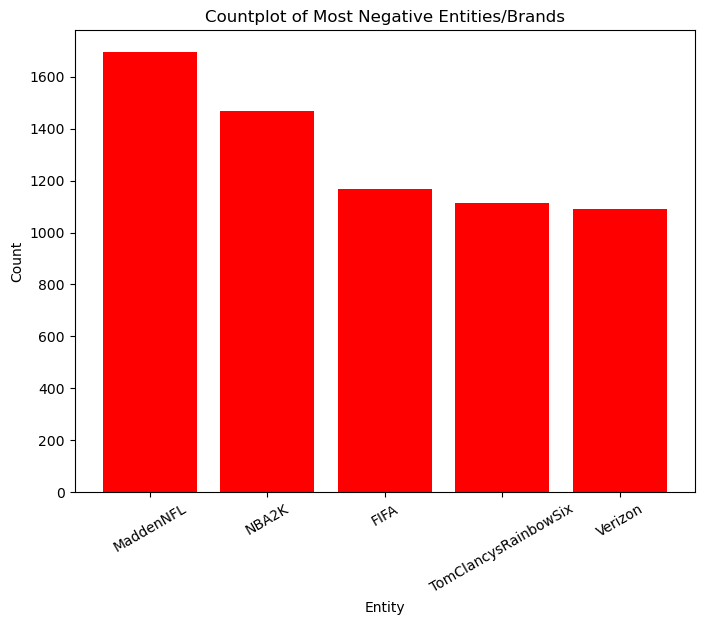

In [45]:
# Create a bar chart for counting most negative entity 
plt.figure(figsize=(8, 6))

# To filter out top 5 'entities/brands' with most negative sentiments
neg_catog = twitter_df[twitter_df['sentiments']=='Negative']['entity'].value_counts().head().index
neg_val = twitter_df[twitter_df['sentiments']=='Negative']['entity'].value_counts().head().values

plt.title('Countplot of Most Negative Entities/Brands')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=30)  # Rotate x-axis labels if needed
plt.yticks()

plt.bar(neg_catog,neg_val,color='r')
plt.show()

In our analysis, we further filtered the dataset to identify the top five brands/entities that received the most negative tweets. The findings are as follows:

1. **Top Negative Entities**:
   - The entity **Madden NFL** emerged as the most negatively discussed brand on Twitter. This indicates a significant level of dissatisfaction or criticism from users.

2. **Implications for Improvement**:
   - These insights provide valuable feedback for the brand. By understanding the nature of the negative sentiments, Madden NFL can identify specific areas for improvement. This data-driven approach allows the brand to address customer concerns and enhance their offerings accordingly.

3. **Benchmarking Against Positive Entities**:
   - Additionally, brands can learn from the entities that received the most positive tweets. By analyzing what aspects users appreciate about these positively perceived brands, Madden NFL can adopt best practices and strategies to improve their user experience and overall sentiment.

This analysis not only highlights the areas needing attention for Madden NFL but also offers a pathway for improvement by leveraging insights from positively received entities. This proactive approach can help the brand enhance its reputation and customer satisfaction in the future.

# 

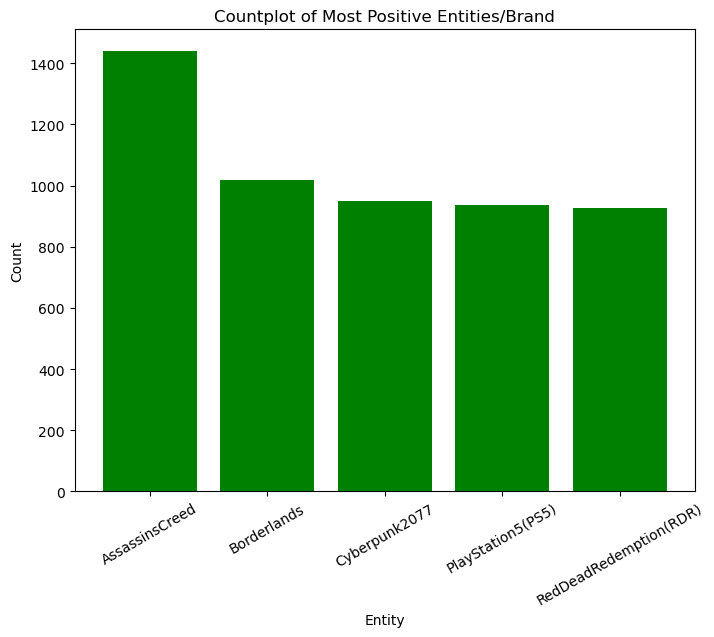

In [46]:
# Create a bar chart for counting most negative entity 
plt.figure(figsize=(8, 6))

# To filter out top 5 'entities/brands' with most negative sentiments
pos_catog = twitter_df[twitter_df['sentiments']=='Positive']['entity'].value_counts().head().index
pos_val = twitter_df[twitter_df['sentiments']=='Positive']['entity'].value_counts().head().values

plt.title('Countplot of Most Positive Entities/Brand')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=30)  # Rotate x-axis labels if needed
plt.yticks()

plt.bar(pos_catog,pos_val,color='g')
plt.show()

Now here 'AssassinsCreed' had recieved most positive tweets. So the brand can use this for promotions and marketing.

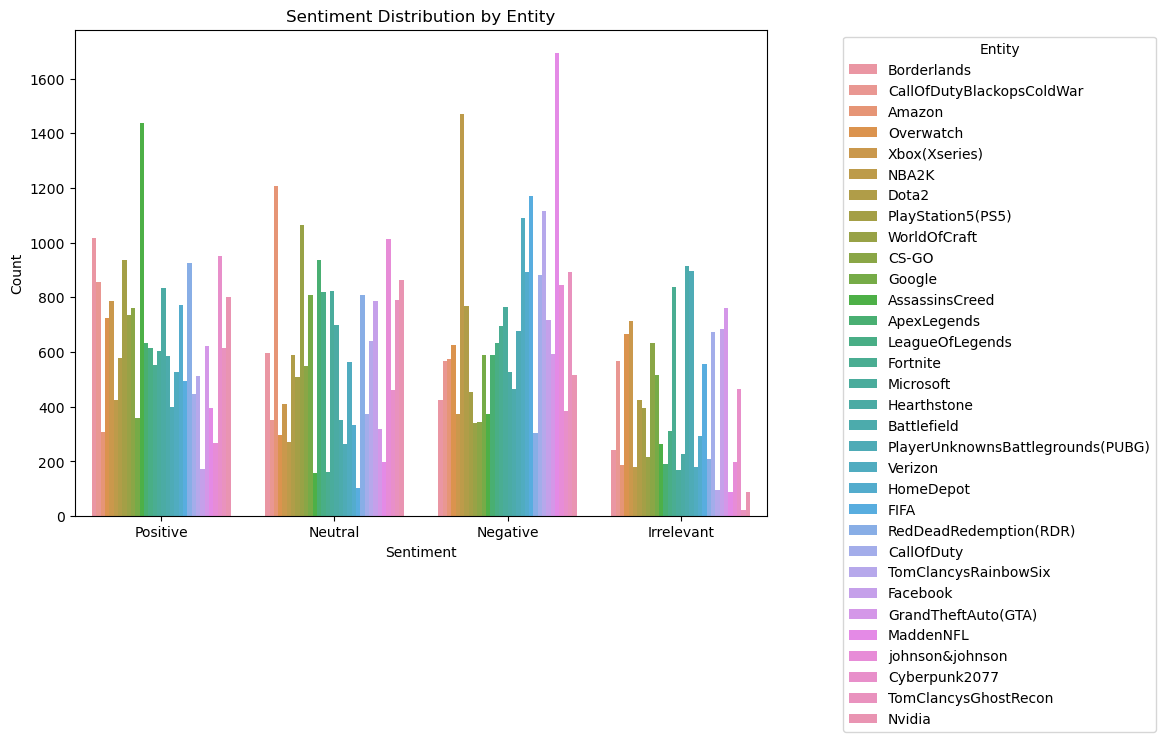

In [47]:
# Sentiment distribution by all entities
plt.figure(figsize=(12, 7))

# Plot the graph
sns.countplot(data=twitter_df, x='sentiments', hue='entity')
plt.title("Sentiment Distribution by Entity")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.legend(title='Entity', bbox_to_anchor=(1.1, 1), loc='upper left') # To set the position for legend
plt.tight_layout()

# To show the graph
plt.show()

Here we can observe all the entity with respect to all the sentitments, according to the legends.

# 

In [50]:
# lets Load NLTK stopwords , wordnet & omw-1.4
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english')) # To get the stopwords ( eg- )

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text with lemmatization and stopwords removal
def preprocess_text(text):
    
    # Remove special characters, numbers, and links
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing with lemmatization and stopwords removal to the 'Content' column
twitter_df['cleaned_content'] = twitter_df['tweet content'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


We have a created a new column in our dataset called 'cleaned_content', which is having a filtered data tweet content data without any special character and url's for further analysis.

In [52]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply sentiment analysis to the 'cleaned_content' column
twitter_df['sentiment_score'] = twitter_df['cleaned_content'].apply(get_sentiment_scores)

# Categorize sentiment based on the compound score
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment categorization
twitter_df['sentiment_predicted'] = twitter_df['sentiment_score'].apply(categorize_sentiment)

# Display the DataFrame with sentiment predictions
print(twitter_df)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


       tweet id       entity sentiments  \
0          2401  Borderlands   Positive   
1          2401  Borderlands   Positive   
2          2401  Borderlands   Positive   
3          2401  Borderlands   Positive   
4          2401  Borderlands   Positive   
...         ...          ...        ...   
74677      9200       Nvidia   Positive   
74678      9200       Nvidia   Positive   
74679      9200       Nvidia   Positive   
74680      9200       Nvidia   Positive   
74681      9200       Nvidia   Positive   

                                           tweet content  \
0      im getting on borderlands and i will murder yo...   
1      I am coming to the borders and I will kill you...   
2      im getting on borderlands and i will kill you ...   
3      im coming on borderlands and i will murder you...   
4      im getting on borderlands 2 and i will murder ...   
...                                                  ...   
74677  Just realized that the Windows partition of my...   
746

So, we have perform sentiment analysis to know more preciously about the sentiments of words/topics in tweet content also we have created two more columns named as 'sentiment_predicted' and 'sentiment_score'. 

# 

In [53]:
twitter_df.head(20)

,tweet id,entity,sentiments,tweet content,cleaned_content,sentiment_score,sentiment_predicted
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderland murder,-0.6908,Negative
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill,-0.6908,Negative
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill,-0.6908,Negative
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderland murder,-0.6908,Negative
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland murder,-0.6908,Negative
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderland murder,-0.6908,Negative
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...,spent hour making something fun dont know huge...,0.9222,Positive
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,spent couple hour something fun dont know im h...,0.9237,Positive
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,spent hour something fun dont know im huge bor...,0.7676,Positive
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...,spent hour making something fun dont know huge...,0.9222,Positive


We can clearly see the two newly created columns contains 'sentiment_score' and 'sentiment_predicted'

In [54]:
# To get the total count for sentiments predicted 

twitter_df['sentiment_predicted'].value_counts()

sentiment_predicted
Positive    34790
Negative    26308
Neutral     12898
Name: count, dtype: int64

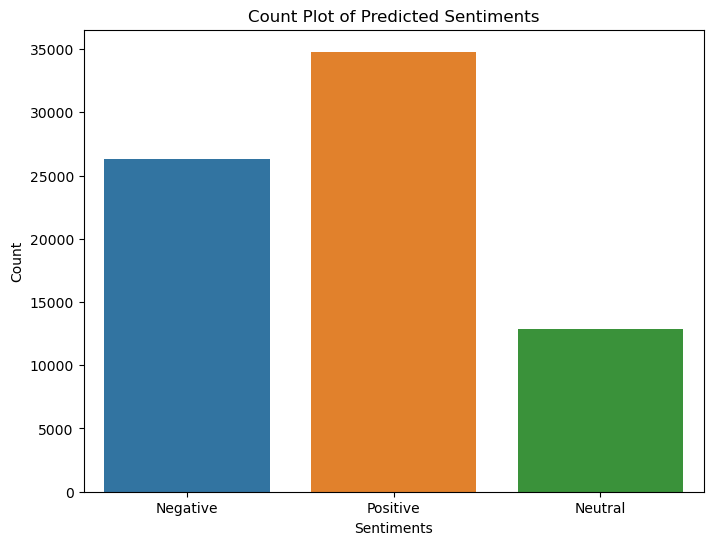

In [55]:
# Create the count plot for distribution of predicted sentiments 
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_predicted', data=twitter_df)

# Add titles and labels
plt.title('Count Plot of Predicted Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Count')

# Show the plot
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


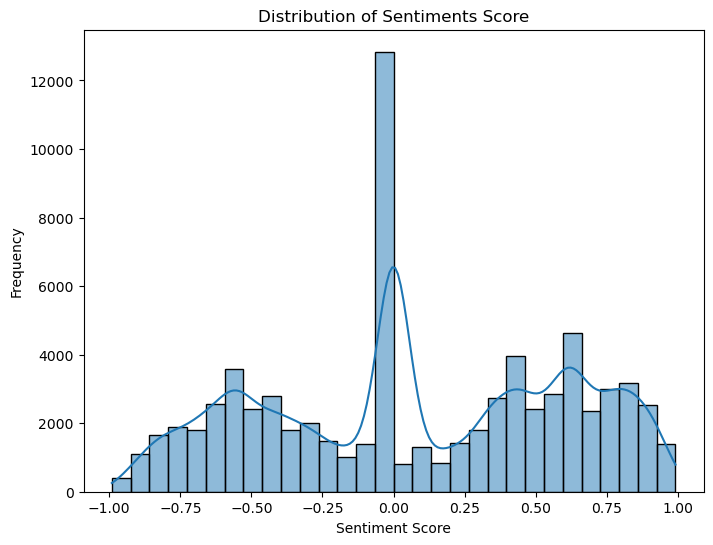

In [57]:
# Create a ditribution graph for sentiment_score column
plt.figure(figsize=(8, 6))

# Plot the histogram
sns.histplot(twitter_df['sentiment_score'], bins=30, kde=True)

# Add titles and labels
plt.title('Distribution of Sentiments Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


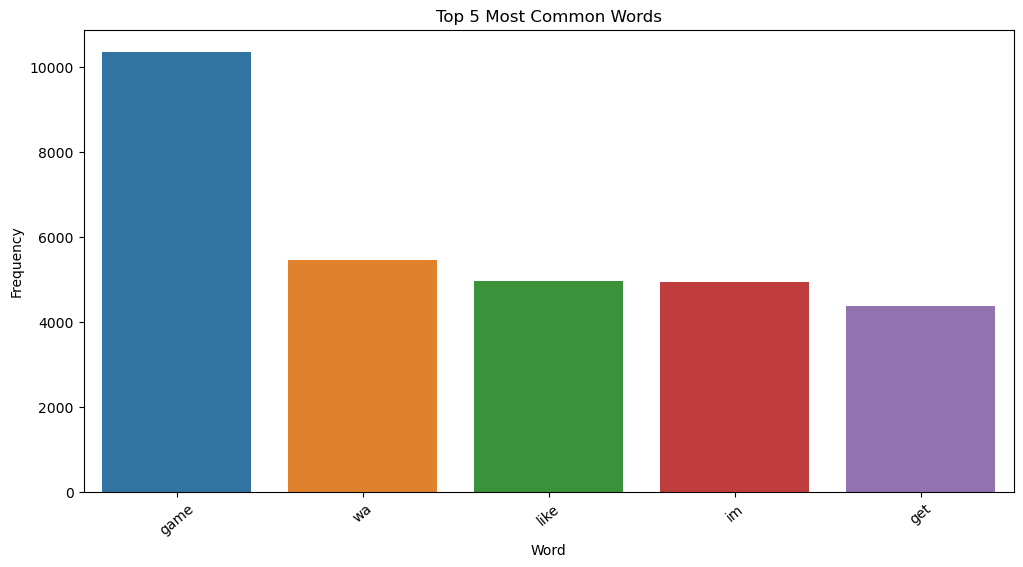

In [58]:
# Word Frequency Analysis
from collections import Counter

words = ' '.join(twitter_df['cleaned_content']).split()
word_counts = Counter(words)
most_common_words = word_counts.most_common(5)

# Plot the top N most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title("Top 5 Most Common Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=40)
plt.show()

# Conclusion

Based on our analysis of the Twitter dataset, we have drawn several key insights:

1. **Prevalence of Topics**:
   - The term "game" emerges as the most frequently discussed topic among the tweets. This indicates a significant interest and engagement in gaming-related discussions on Twitter.

2. **Sentiment Analysis of Entities**:
   - **Assassin's Creed**: This entity is identified as one of the most positively regarded games on Twitter. The high volume of positive sentiments suggests a strong fan base and favorable reception.
   - **Madden NFL**: Conversely, Madden NFL is highlighted as one of the most negatively discussed entities. This implies a notable level of dissatisfaction or criticism among its audience.

3. **Sentiment Distribution**:
   - The analysis revealed a diverse distribution of sentiments across various entities. While some entities garnered predominantly positive feedback, others were subject to mixed or negative sentiments.

4. **Data Cleaning and Preprocessing**:
   - Initial inspection of the dataset showed the presence of null values, particularly in the 'tweet content' column. These null values were subsequently removed to ensure the integrity and reliability of our analysis.

5. **Visualization Insights**:
   - Pie charts, bar graphs, and count plots were utilized to visually represent the sentiment distribution, the prevalence of entities, and the frequency of common words. These visualizations aided in highlighting the trends and patterns within the dataset.

6. **Sentiment Analysis with VADER**:
   - The VADER sentiment analysis tool was employed to assign sentiment scores to the tweets. Tweets were categorized as positive, negative, or neutral based on their compound scores. This automated approach provided an objective measure of the overall sentiment towards each entity.

7. **Word Frequency Analysis**:
   - A word frequency analysis was conducted to identify the most commonly used words in the tweets. This further reinforced the prominence of gaming-related terms in the dataset.

In summary, the analysis indicates that gaming is a highly engaging topic on Twitter, with specific games like Assassin's Creed and Madden NFL eliciting strong reactions from users. The methodologies applied in this project, including data cleaning, sentiment analysis, and visualization, collectively provide a comprehensive understanding of the sentiments expressed towards various gaming entities on Twitter.